In [83]:
import tensorflow as ts
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [27]:
import tensorflow as tf
if tf.__version__.startswith("2."):
  import tensorflow.compat.v1 as tf
  tf.compat.v1.disable_v2_behavior()
  tf.compat.v1.disable_eager_execution()

Instructions for updating:
non-resource variables are not supported in the long term


In [6]:
fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 2s 0us/step


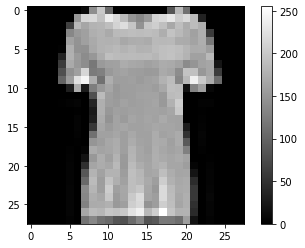

In [9]:
plt.imshow(train_images[10], cmap = 'gray')
plt.colorbar()

In [39]:
num_images, width, height = np.shape(train_images)
image_size = width * height
num_images, image_size

(60000, 784)

In [55]:
dict_labels = {
    0: "T-shirt/top",
    1: "Trouser",
    2: "Pullover",
    3: "Dress",
    4: "Coat",
    5: "Sandal",
    6: "Shirt",
    7: "Sneaker",
    8: "Bag",
    9: "Ankle boot"
}
num_labels = len(dict_labels)

In [85]:
data_x = np.hstack((np.reshape(train_images,(num_images,-1)),np.ones((num_images,1))))  # incluyendo bias
np.shape(data_x)

(60000, 785)

In [76]:
lr = 0.01

In [92]:
tf.reset_default_graph()
g = tf.Graph()
with g.as_default():
    weights = tf.Variable(tf.zeros((image_size+1,num_labels)), dtype=tf.float32, name = "weights")   #matrix de 785x10
    tensor_x = tf.placeholder(dtype=tf.float32,name="Images")
    tensor_y = tf.placeholder(dtype=tf.int32,name="Labels")
    tensor_lr = tf.placeholder(dtype=tf.float32,name="LR")
    ohe_y = tf.reshape(tf.one_hot(data_y, num_labels),(num_images,-1))

    with tf.Session(graph=g) as session:
        init = tf.global_variables_initializer()
        session.run(init)
        feed_dict = {tensor_x:data_x, tensor_y:train_labels, tensor_lr: lr}
        wei, ohe = session.run([weights, ohe_y],feed_dict=feed_dict)
        

